In [1]:
import sys
import warnings

In [2]:
sys.path.append('C:/Users/vmysorea/mne-python/')
sys.path.append('C:/Users/vmysorea/ANLffr/')

In [3]:
import mne 
from anlffr.helper import biosemi2mne as bs
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi']  = 120

In [4]:
bs.importbdf?

In [5]:
raw_1, eves_1 = bs.importbdf ('D:/CMR_Data/EEG_Data/Varsha_CMR_pilot_all+005.bdf')
raw_2, eves_2 = bs.importbdf('D:/CMR_Data/EEG_Data/Varsha_CMR_pilot_all+006.bdf')
raw_3, eves_3 = bs.importbdf('D:/CMR_Data/EEG_Data/Varsha_CMR_pilot_all+007.bdf')
raw_full, eves_full = mne.concatenate_raws ([raw_1,raw_2,raw_3], events_list=[eves_1,eves_2,eves_3]) 

Extracting EDF parameters from D:\CMR_Data\EEG_Data\Varsha_CMR_pilot_all+005.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4358143  =      0.000 ...   266.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom EEG reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
2908 events found
Event IDs: [  1   2  21  22 253]
Extracting EDF parameters from D:\CMR_Data\EEG_Data\Varsha_CMR_pilot_all+006.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4358143  =      0.000 ...   266.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom EEG reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
337 events found
Event IDs: [ 21  22 233]
Extracting ED

In [6]:
#Filtering

In [7]:
raw_full.filter (1., 40.)

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 54069 samples (3.300 sec)



<RawEDF | Varsha_CMR_pilot_all+005.bdf, 41 x 9158656 (559.0 s), ~2.80 GB, data loaded>

In [8]:
raw_full.info
%whos

Variable    Type       Data/Info
--------------------------------
bs          module     <module 'anlffr.helper.bi<...>\helper\\biosemi2mne.py'>
eves_1      ndarray    2908x3: 8724 elems, type `int64`, 69792 bytes
eves_2      ndarray    337x3: 1011 elems, type `int64`, 8088 bytes
eves_3      ndarray    31x3: 93 elems, type `int64`, 744 bytes
eves_full   ndarray    3276x3: 9828 elems, type `int64`, 78624 bytes
mne         module     <module 'mne' from 'C:/Us<...>ython\\mne\\__init__.py'>
plt         module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
raw_1       RawEDF     <RawEDF | Varsha_CMR_pilo<...>), ~2.80 GB, data loaded>
raw_2       RawEDF     <RawEDF | Varsha_CMR_pilo<...>), ~1.33 GB, data loaded>
raw_3       RawEDF     <RawEDF | Varsha_CMR_pilo<...>, ~138.4 MB, data loaded>
raw_full    RawEDF     <RawEDF | Varsha_CMR_pilo<...>), ~2.80 GB, data loaded>
sys         module     <module 'sys' (built-in)>
warnings    module     <module 'warnings' from '<...>onda3\\lib\

In [9]:
#Remove blink artifacts

In [10]:
%matplotlib
#raw_full.plot(duration=25.0, n_channels=32, scalings=dict(eeg=200e-6))

Using matplotlib backend: Qt5Agg


In [11]:
from anlffr.preproc import find_blinks
blinks = find_blinks(raw_full)
#raw.plot(events=blinks, duration=25.0, n_channels=32, scalings=dict(eeg=200e-6))

Setting up band-pass filter from 0.5 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.15 Hz (-6 dB cutoff frequency: 0.42 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 360449 samples (22.000 sec)



In [12]:
from mne import compute_proj_epochs
epochs_blinks = mne.Epochs(raw_full, blinks, event_id=998, baseline=(-0.25, 0.25),
                           reject=dict(eeg=500e-6), tmin=-0.25, tmax=0.25)

Not setting metadata
Not setting metadata
140 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [13]:
blink_proj = compute_proj_epochs(epochs_blinks, n_eeg=2)

No gradiometers found. Forcing n_grad to 0
No magnetometers found. Forcing n_mag to 0
Adding projection: eeg-998--0.250-0.250-PCA-01
Adding projection: eeg-998--0.250-0.250-PCA-02


In [14]:
raw_full.add_proj(blink_proj)

2 projection items deactivated


<RawEDF | Varsha_CMR_pilot_all+005.bdf, 41 x 9158656 (559.0 s), ~2.80 GB, data loaded>

In [15]:
#raw.plot_projs_topomap()       #Visualizing the spatial filter

In [16]:
#raw.plot(events=blinks, duration=25.0, n_channels=32, scalings=dict(eeg=200e-6),proj=True)

In [17]:
#Epoching

In [18]:
epochs_1 = mne.Epochs(raw_full, eves_full, event_id= 21, baseline=(-0.3, 0.), proj=True,
                    tmin=-0.3, tmax=1, reject=dict(eeg=200e-6))
epochs_2 = mne.Epochs(raw_full, eves_full, event_id= 22, baseline=(-0.3, 0.), proj=True,
                    tmin=-0.3, tmax=1, reject=dict(eeg=200e-6))

Not setting metadata
Not setting metadata
280 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 2)
2 projection items activated
Not setting metadata
Not setting metadata
280 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 2)
2 projection items activated


In [19]:
labels = ['Cortex_CORR_LowSNR', 'Cortex_ACORR_LowSNR']

In [20]:
#Averaging

In [21]:
evoked_1 = epochs_1.average() 
evoked_2 = epochs_2.average() 

In [22]:
#evoked_1.plot(gfp=True, spatial_colors=True,titles=labels[0])
#evoked_2.plot(gfp=True, spatial_colors=True,titles=labels[1])

In [23]:
#evoked_1.plot(gfp='only',titles=labels[0])
#evoked_2.plot(gfp='only',titles=labels[1])

Need more than one channel to make topography for eeg. Disabling interactivity.
Need more than one channel to make topography for eeg. Disabling interactivity.


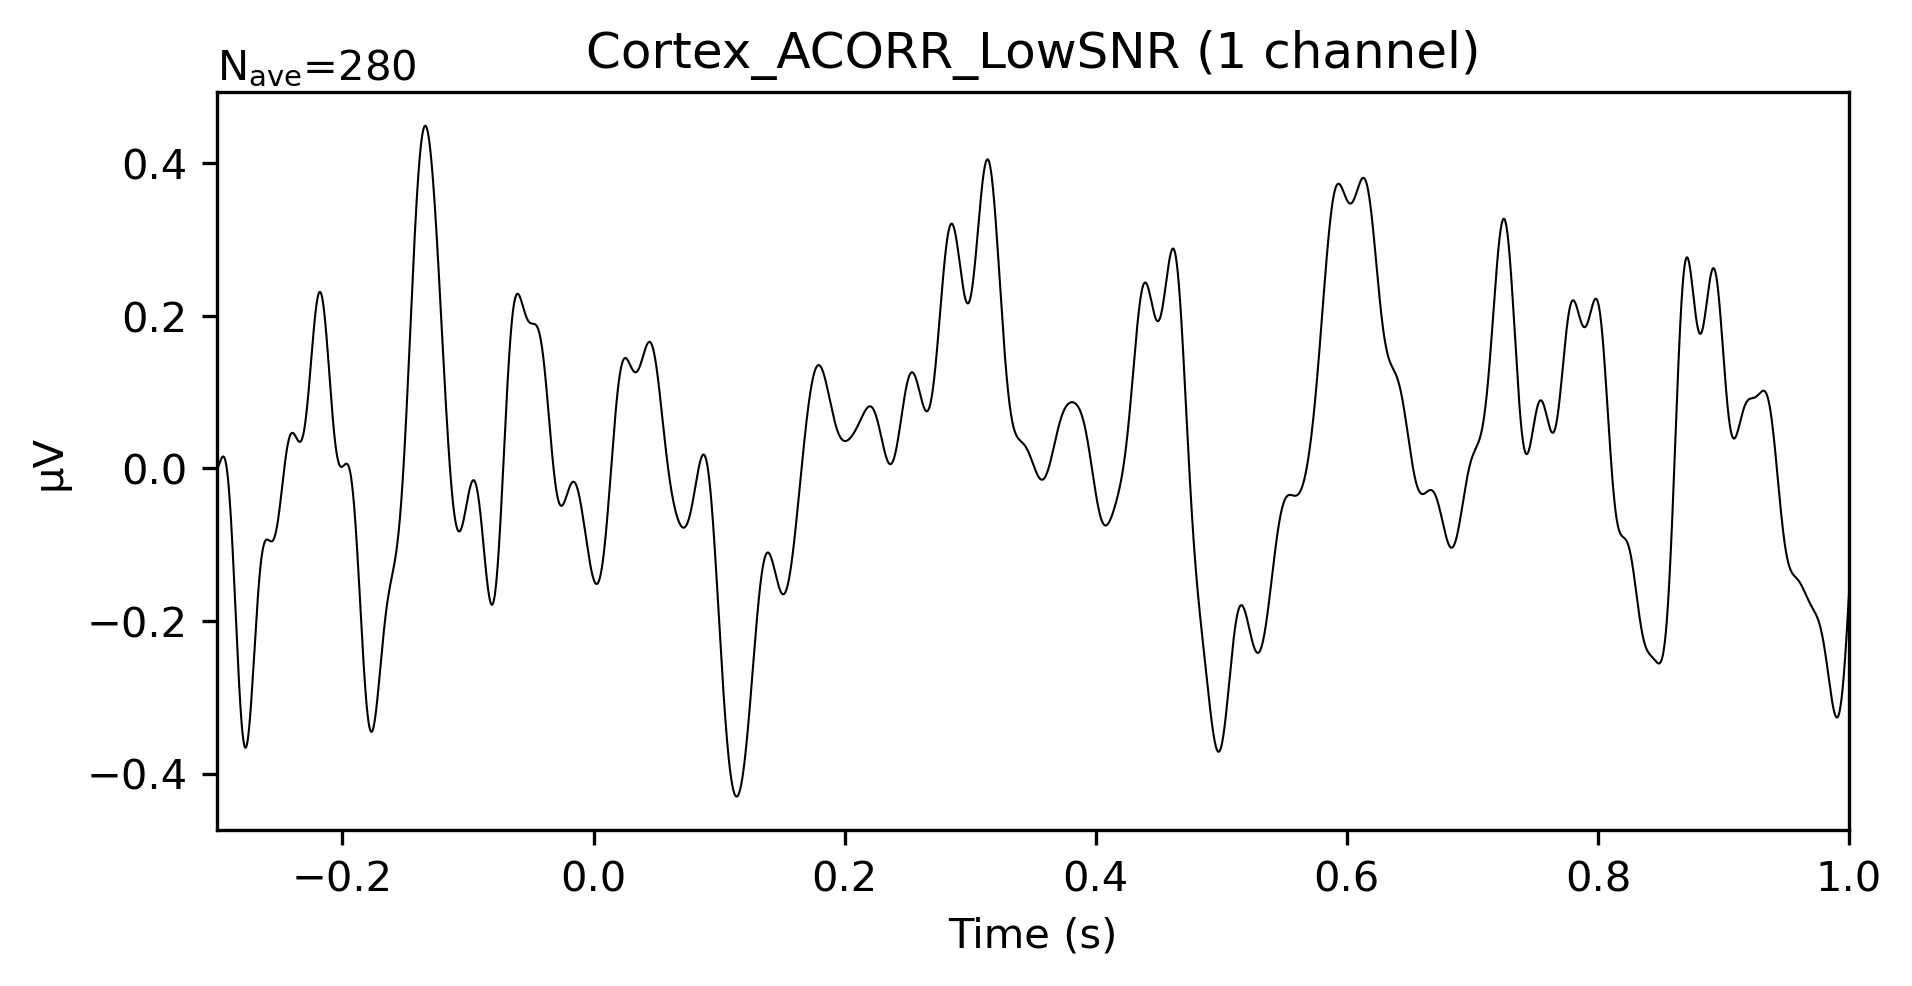

In [24]:
picks = ['A32'] 
evoked_1.plot(picks=picks,titles=labels[0])
evoked_2.plot(picks=picks,titles=labels[1])

In [25]:
picks=['A29','A30','A31', 'A32']
evokeds = dict(CORR=evoked_1, ACORR=evoked_2)
mne.viz.plot_compare_evokeds(evokeds, combine='mean',title='Cortex_LowSNR')

combining channels using "mean"
combining channels using "mean"


[<Figure size 2400x1800 with 1 Axes>]

In [26]:
#Visualizing spatial configuration

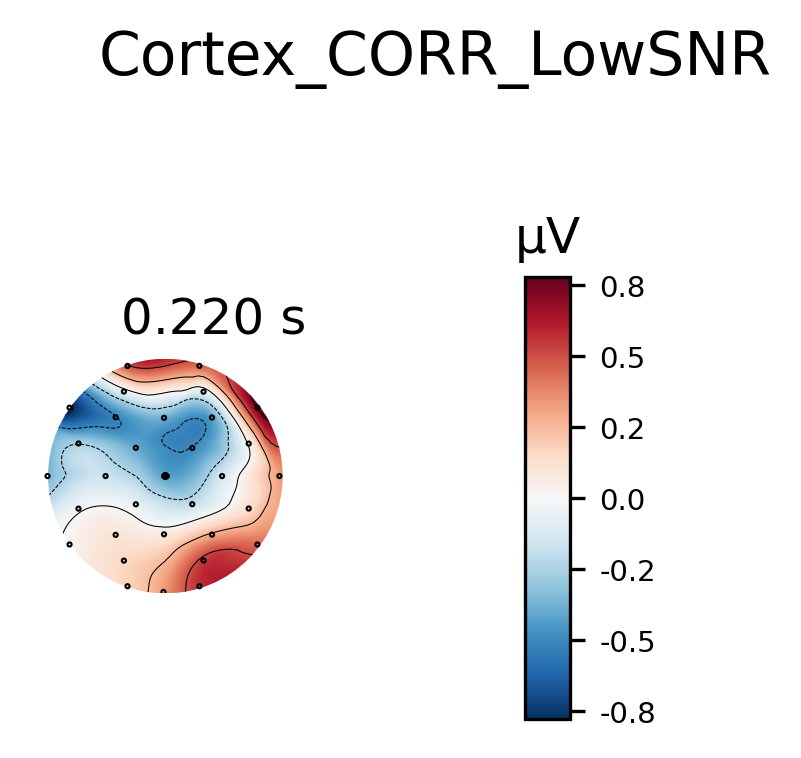

In [27]:
evoked_1.plot_topomap(0.220, title='Cortex_CORR_LowSNR')          #Visualizing spatial configuration of the response

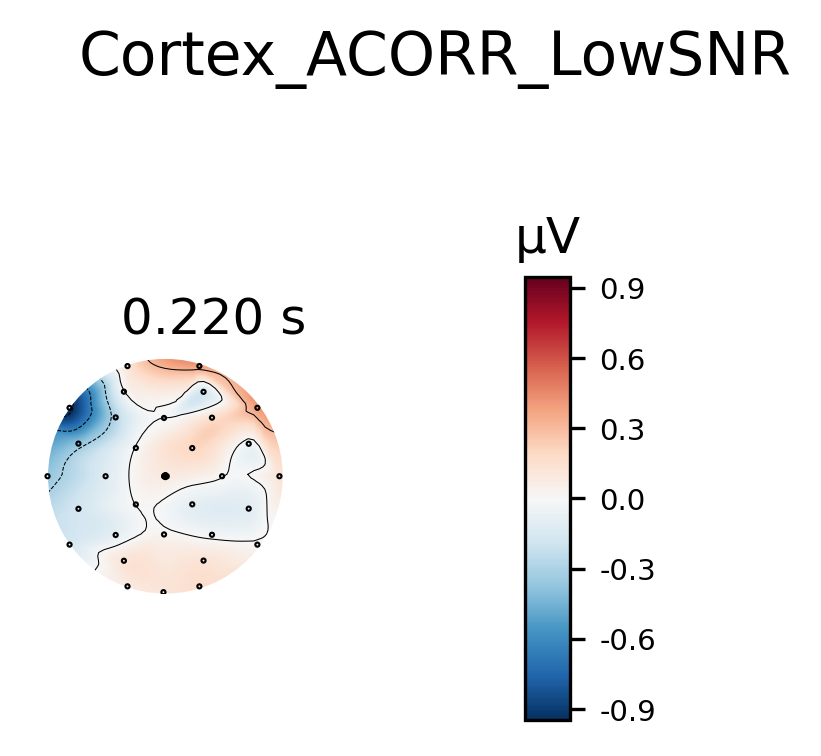

In [28]:
evoked_2.plot_topomap(0.220, title='Cortex_ACORR_LowSNR')